# Classifying Fashion MNIST

## Check for GPU or CPU!?

In [13]:
import torch
print(torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

False
cpu


In [ ]:
import torch
from torchvision import datasets, transforms
import helper

# Instructions from here:
# https://www.kaggle.com/ishvindersethi22/fashion-mnist-using-pytorch/data

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.], [0.5])])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)





26427392it [00:28, 2532339.70it/s]                              

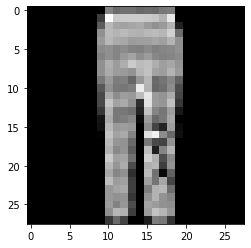

In [15]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np

def imshow(img):
    img = img / 2 + 0.     # unnormalize
    img = img.squeeze()
    plt.imshow(img, cmap='gray')
    
images, label = next(iter(trainloader))
imshow(images[0, :])


# Define and train the network

In [16]:
from collections import OrderedDict
from torch import optim, nn

hidden_units = [4, 8, 16]
output_units = 10

class Flatten(nn.Module):
  def forward(self, input):
    return input.view(input.size(0), -1)

model_d = nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(1, hidden_units[0], 3, stride=2, padding=1)),
    ('Relu1', nn.ReLU()),
    ('conv2', nn.Conv2d(hidden_units[0], hidden_units[1], 3, stride=2, padding=1)),
    ('Relu2', nn.ReLU()),
    ('conv3', nn.Conv2d(hidden_units[1], hidden_units[2], 3, stride=2, padding=1)),
    ('Relu3', nn.ReLU()),
    ('conv4', nn.Conv2d(hidden_units[2], output_units, 4, stride=4, padding=0)),
    ('log_softmax', nn.LogSoftmax(dim = 1))
]))
model_d.to(device)
optimizer_d = optim.Adam(model_d.parameters(), lr = 0.01)

criterion = nn.NLLLoss()
epochs = 10
for i in range(epochs):
  running_classification_loss = 0
  running_cycle_consistent_loss = 0
  running_loss = 0
  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    optimizer_d.zero_grad()
    
    # Run classification model
    predicted_labels = model_d(images)
    classification_loss = criterion(Flatten()(predicted_labels), labels)
    
    # Optimize classification weights
    classification_loss.backward()
    optimizer_d.step()
    
    running_classification_loss += classification_loss.item()
    running_loss = running_classification_loss
  else:
    print(f"{i} Training loss: {running_loss/len(trainloader)}")


0 Training loss: 0.4939731030639555
1 Training loss: 0.3746613796347621
2 Training loss: 0.35785431454557853
3 Training loss: 0.34818224168058903
4 Training loss: 0.34039132460665855
5 Training loss: 0.3382239228388521
6 Training loss: 0.3307722770313083
7 Training loss: 0.32912019096108386
8 Training loss: 0.3270530810853693
9 Training loss: 0.32475298651055234


# Evaluate the network

Accuracy: 0.8725
Correct Label: 5
Predicted Label: 5


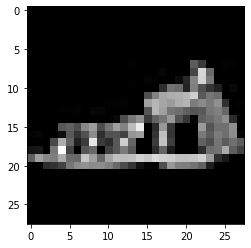

In [17]:
total_correct = 0
total_num = 0
for images, labels in testloader:
  images, labels = images.to(device), labels.to(device) 
  ps = Flatten()(torch.exp(model_d(images)))
  predictions = ps.topk(1, 1, True, True)[1].t()
  correct = predictions.eq(labels.view(1, -1))
  
  total_correct += correct.sum().cpu().numpy()
  total_num += images.shape[0]
  
print('Accuracy:', total_correct / float(total_num))

print('Correct Label:', labels[0].item())
print('Predicted Label:', predictions[0, 0].item())
index = 0
imshow(images[index, :].cpu())

# This notebook demonstrates all the working parts of an Image Classification network.
## 1.We load the Fashion MNIST dataset

## 2.Define a simple Deep Convolutional Network

## 3.We optimize the network weights using the Adam optimizer on the GPU

## 4.We evaluate the network and achieve an accuracy of approximately 85%